## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
# In telecom 

In [2]:
# Import the Data wrangling libraries
import numpy as np
import pandas as pd

# Import the Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Because our date is stored in a google drive.
# To import the dataset, first we have to mount the google drive.
from google.colab import drive
# Location in google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Read Telecom Churn(our dataset) csv file.
df = pd.read_csv("/content/drive/My Drive/Projects/Data/Telecom_Churn.csv")

In [12]:
# Lets meet with our data
# Check first 5 rows from our data set.
df.head()
# return n(by default 5) rows from our dataset. It helps in understanding our data and check that we have right data in it.

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
# Lets meet with our data
# Check last 5 rows from our data set.
df.tail()
# Like head, tail is use to check last 5 rows and verify that everything is in place.

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [16]:
# Lets make concise summary of our dataset.
# Info method is used to check index and columns data type.
# It also give information about missing data and memory usage. 
df.info()
# As we can see there is no missing data so thats a relief.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [22]:
# As we can see there is lot of Numeric(float and int) columns
# Describe method gives us descriptive statistics about all numeric columns.
# We can see dispersion in our data and shape of dataset's distribution.
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [20]:
# We already know there is no missing values here(from our info method), But there is no harm in double check.
# As they say "Prevention is better than cure".
# It gives us if any column has missing value. 
df.isnull().sum().max()
# By this we are sure there are not any missing values in our dataset.

0

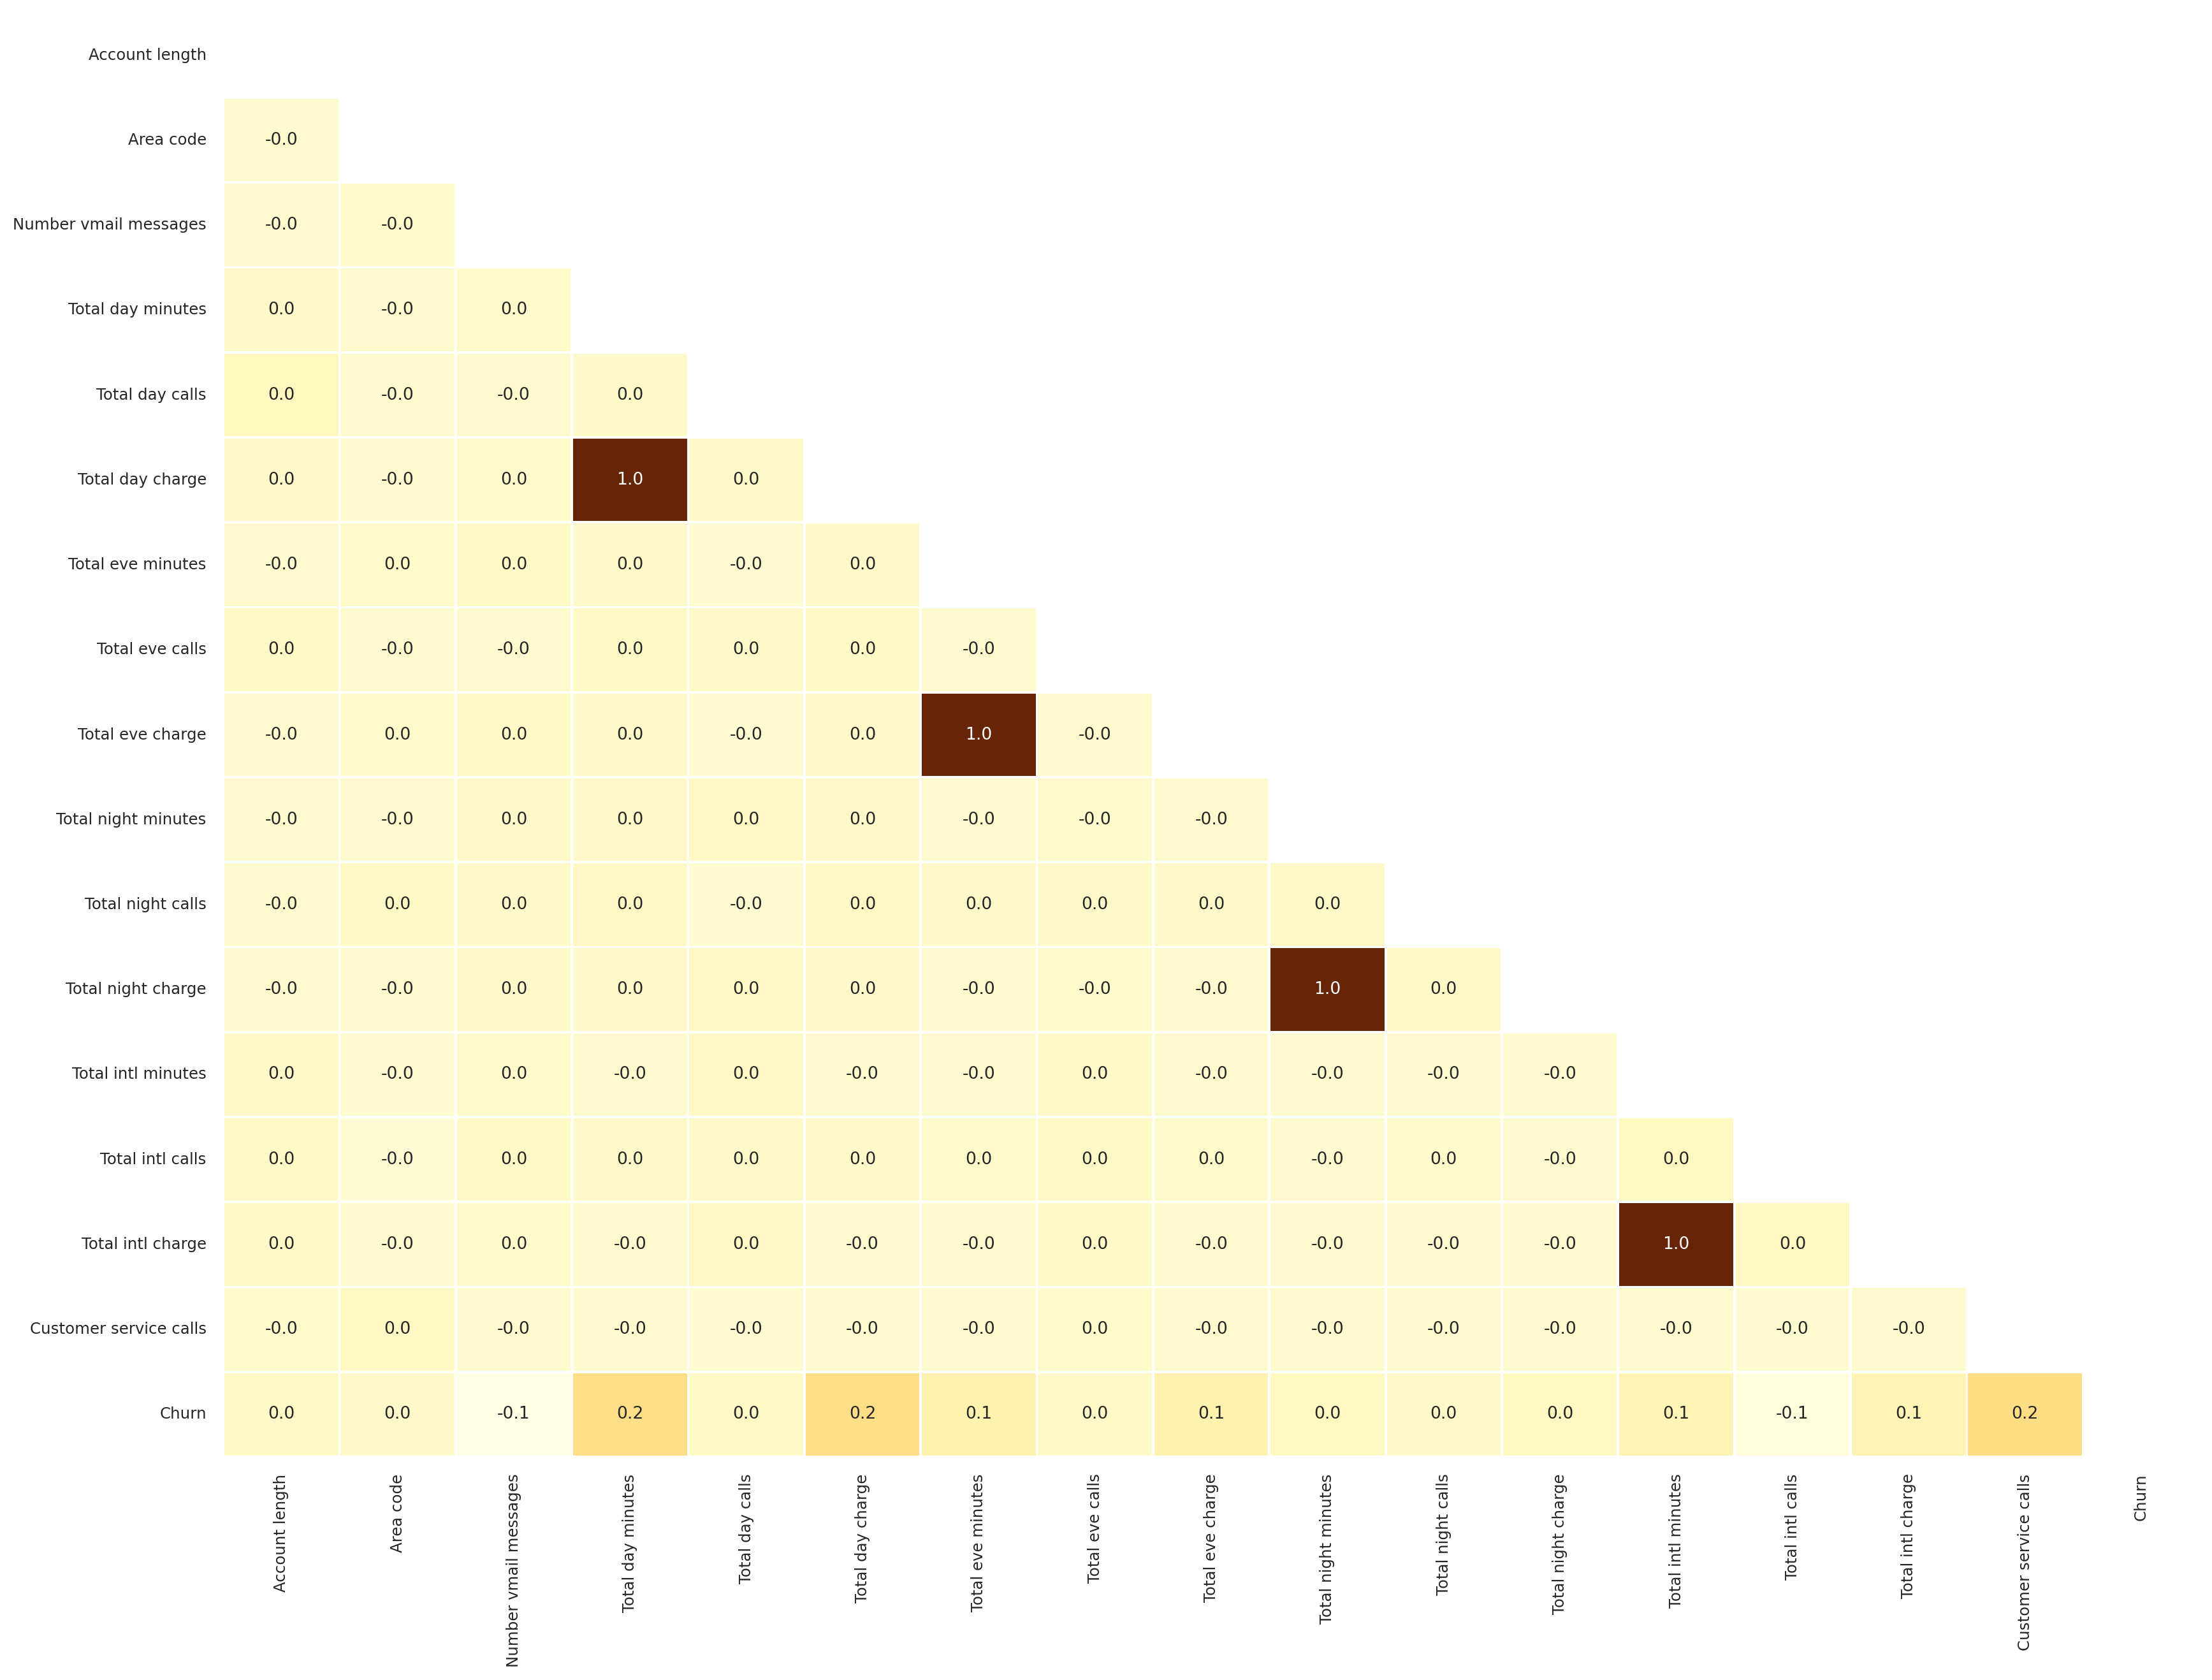

In [26]:
# Show numerical correlations(pearson) between columns on heatmap.
sns.set(font_scale=0.8, style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 15), dpi=200)
sns.heatmap(corr, 
           annot=True, # write the data value in each cell.
           fmt='.1f', # Format the float value to one place after decimal.
           mask=mask, # We only need half heatmap, other half is exactly the same.
           cmap="YlOrBr", # Color Yellow Orange Brown
           linewidths=1, # Width of the lines that will divide each cell
           cbar=False); # We don't need color bar.
